In [2]:
import numpy as np
import pickle as pcl

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

from methods.training import load_data

from predict import predict

from sklearn.model_selection import ShuffleSplit

/home/cl19abx/Learning_SFHs/venv/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cl19abx/Learning_SFHs/venv/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cl19abx/Learning_SFHs/venv/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cl19abx/Learning_SFHs/venv/lib64/python3

CNN learning curve

In [3]:
def learning_curve(inst, size, features, predictors, smape_train, smape_test, n_splits=3):
    
    if size > len(features):
        print('chosen size larger than number of features.')
        return None
#         raise ValueError('chosen size larger than number of features.')

    test_frac = 1 - (size / len(features))

    ss = ShuffleSplit(n_splits=n_splits, test_size=test_frac)

    for j, (train, test) in enumerate(ss.split(features)):

        tra = np.zeros(len(features), dtype='bool')
        tra[train] = True

        model, scores = inst.create_cnn_model(features, predictors, batch_size=10, train=tra, 
                                            plot=False, verbose=False)

        smape_test[size][j] = scores['loss']
        smape_train[size][j], mae, mse, acc = model.evaluate(features[train], predictors[train], verbose=0)


    return smape_train, smape_test

In [4]:
n_splits = 6
train_sizes =np.arange(200,10000,step=300)

## Illustris

In [8]:
si = predict(fname='data/full_histories_illustris.h5')

illustris_dust_noise, wl = si.load_spectra('Noisified Dust')
features = si.prepare_features(illustris_dust_noise, key='Dust Noise SN50', CNN=True)

predictors = si.load_arr('log_8','SFH')

In [21]:
# smape_train, smape_test = pcl.load(open('data/learning_curve_illustris.p', 'rb'))

## uncomment to rewrite!
# smape_test = {size: [None] * n_splits for size in train_sizes}
# smape_train = {size: [None] * n_splits for size in train_sizes}

for size in train_sizes:
    print(size)
    if smape_test[size][0] is None:
        print("train...")
        smape_train, smape_test = learning_curve(si, size, features, predictors, 
                                                 smape_train, smape_test, n_splits=n_splits)
        
#         pcl.dump([smape_train, smape_test], open('data/learning_curve_illustris.p', 'wb'))


200
500
800
1100
1400
1700
2000
2300
2600
2900
3200
3500
3800
4100
4400
4700
5000
5300
5600
5900
train...

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.
Epoch 00105: early stopping
Test SMAPE: 0.13499420270141715

Epoch 00043: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00063: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00101: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00142: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.

Epoch 00157: ReduceLROnPlateau reducing learning rate to 2.1874999220017344e-05.

Epoch 00170: ReduceLROnPlateau reducing learning rate to 1.0937499610008672e-05.
Epoch 00174: early stopping
Test SMAPE: 0.13205882506428795

Epoch 00064: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00104: ReduceLROnPlateau reducing 

TypeError: 'NoneType' object is not iterable

In [46]:
# smape_train = {key: val for key, val in smape_train.items() if val[0] is not None}
# smape_test = {key: val for key, val in smape_test.items() if val[0] is not None}

# pcl.dump([smape_train, smape_test], open('data/learning_curve_illustris.p', 'wb'))

## EAGLE

In [4]:
n_splits = 6

In [11]:
se = predict(fname='data/full_histories_eagle.h5')

eagle_dust_noise, wl = se.load_spectra('Noisified Dust')
features = se.prepare_features(eagle_dust_noise, key='Dust Noise SN50', CNN=True)

predictors = se.load_arr('log_8','SFH')

In [12]:
smape_test = {size: [None] * n_splits for size in train_sizes}
smape_train = {size: [None] * n_splits for size in train_sizes}

# smape_train, smape_test = pcl.load(open('data/learning_curve_eagle_hmass.p', 'rb'))

In [ ]:
for size in train_sizes:
    print(size)
    smape_train, smape_test = learning_curve(se, size, features, predictors, 
                                             smape_train, smape_test, n_splits=n_splits)
    
    pcl.dump([smape_train, smape_test], open('data/learning_curve_eagle.p', 'wb'))


200

Epoch 00060: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00092: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00112: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
Epoch 00116: early stopping
Test SMAPE: 0.22353914898430546

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00073: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00114: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
Epoch 00118: early stopping
Test SMAPE: 0.2416300189112195

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00094: ReduceLROnPlateau reducing learning rate to 8.7499


Epoch 00122: ReduceLROnPlateau reducing learning rate to 1.0937499610008672e-05.

Epoch 00138: ReduceLROnPlateau reducing learning rate to 5.468749805004336e-06.
Epoch 00142: early stopping
Test SMAPE: 0.19075241295687015

Epoch 00068: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00097: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00130: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
Epoch 00134: early stopping
Test SMAPE: 0.18038458161781523
1400

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00096: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00113: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
Epoch 00117: early stopping
Test SMAPE: 0.17925738518186984

E


Epoch 00098: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00111: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.
Epoch 00115: early stopping
Test SMAPE: 0.1665166079397377

Epoch 00077: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00093: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00107: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00133: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.

Epoch 00142: ReduceLROnPlateau reducing learning rate to 2.1874999220017344e-05.

Epoch 00153: ReduceLROnPlateau reducing learning rate to 1.0937499610008672e-05.

Epoch 00169: ReduceLROnPlateau reducing learning rate to 5.468749805004336e-06.
Epoch 00173: early stopping
Test SMAPE: 0.16568273007339746

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00065: ReduceLROnPlateau reducing learning rate to 0.00017499


Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00070: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.
Epoch 00074: early stopping
Test SMAPE: 0.167179678965554

Epoch 00051: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00083: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00105: ReduceLROnPlateau reducing learning rate to 8.749999688006938e-05.

Epoch 00131: ReduceLROnPlateau reducing learning rate to 4.374999844003469e-05.

Epoch 00144: ReduceLROnPlateau reducing learning rate to 2.1874999220017344e-05.

Epoch 00169: ReduceLROnPlateau reducing learning rate to 1.0937499610008672e-05.
Epoch 00173: early stopping
Test SMAPE: 0.15508023591705017

Epoch 00042: ReduceLROnPlateau reducing learning rate to 0.0003499999875202775.

Epoch 00055: ReduceLROnPlateau reducing learning rate to 0.00017499999376013875.

Epoch 00087: ReduceLROnPlateau reducing learning rate to 8.7499996

In [15]:
smape_train = {key: val for key, val in smape_train.items() if val[0] is not None}
smape_test = {key: val for key, val in smape_test.items() if val[0] is not None}

pcl.dump([smape_train, smape_test], open('data/learning_curve_eagle.p', 'wb'))

## Load pickles

In [5]:
# smape_train_e, smape_test_e = pcl.load(open('../derivedSFH/data/learning_curve_eagle_hmass.p', 'rb'))
smape_train_e, smape_test_e = pcl.load(open('data/learning_curve_eagle.p', 'rb'))
# smape_train_i, smape_test_i = pcl.load(open('../derivedSFH/data/learning_curve_illustris_hmass.p', 'rb'))
smape_train_i, smape_test_i = pcl.load(open('data/learning_curve_illustris.p', 'rb'))

No handles with labels found to put in legend.


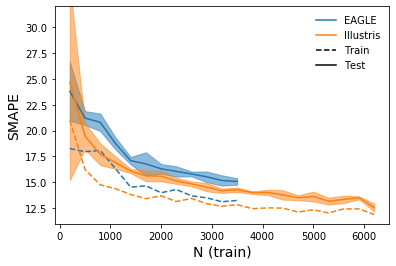

In [19]:
fig = plt.figure()

med = np.median([smape_test_e[idx] for idx in smape_test_e.keys()], axis=1) * 100
std = np.std([smape_test_e[idx] for idx in smape_test_e.keys()], axis=1) * 100

plt.fill_between(np.array(list(smape_test_e.keys())), 
                          med-std,med+std, color='C0', alpha=0.5)

e_line = plt.plot(np.array(list(smape_train_e.keys())), med, color='C0', ls='solid')


med = np.median([smape_train_e[idx] for idx in smape_test_e.keys()], axis=1) * 100
plt.plot(np.array(list(smape_train_e.keys())), med, color='C0', ls='dashed')


med = np.median([smape_test_i[idx] for idx in smape_test_i.keys()], axis=1) * 100
std = np.std([smape_test_i[idx] for idx in smape_test_i.keys()], axis=1) * 100

plt.fill_between(np.array(list(smape_test_i.keys())), 
                          med-std,med+std, color='C1', alpha=0.5)

i_line = plt.plot(np.array(list(smape_test_i.keys())), med, color='C1', ls='solid')

med = np.median([smape_train_i[idx] for idx in smape_test_i.keys()], axis=1) * 100
plt.plot(np.array(list(smape_test_i.keys())), med, color='C1', ls='dashed')


plt.legend()

plt.xlabel('N (train)', size=14)
plt.ylabel('SMAPE', size=14)

plt.ylim(11,32)

from matplotlib.lines import Line2D
train_line = Line2D([0],[0],color='black', linestyle='dashed')
test_line = Line2D([0],[0],color='black', linestyle='solid')
plt.legend([e_line[0], i_line[0], train_line, test_line], 
           ['EAGLE', 'Illustris','Train', 'Test'], 
           frameon=False)

# fig.savefig('plots/learning_curves.png', dpi=200, bbox_inches='tight')